In [1]:
import numpy as np
import cv2
from iced import filter
from iced import normalization
from utility import *
import matplotlib.pyplot as plt
from matplotlib import colors
from iced import normalization
from iced import filter
from scipy.stats import t
import os
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/watson/scripts/virt/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
name = "MIT"
root = "../data"
file_dir_template = "/extracted_all_contact_%s"
file_dir_template = "%s/%s"%(root, file_dir_template)
file_name_template = "%s/all_in_one_500kb.npy"%(file_dir_template)
print("File Directory: \"%s\""%file_dir_template)
print("File Name Template: \"%s\""%file_name_template)

File Directory: "../data//extracted_all_contact_%s"
File Name Template: "../data//extracted_all_contact_%s/all_in_one_500kb.npy"


In [6]:
low_res = {}
mit_low = np.load(file_name_template%name)
all_low = np.load(file_name_template%'ALL')

Number of rows and columns: 1, 1


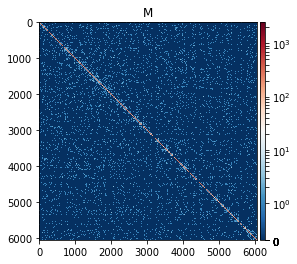

In [7]:
pylab.rcParams['figure.figsize'] = (5, 4)
#fig, axes = plt.subplots(ncols=1)
#m = axes.imshow(grand_scheme_of_things, cmap="RdBu_r", norm=colors.SymLogNorm(1))
#cb = fig.colorbar(m)
#plt.show()
images = []
images.append(mit_low)
showImages(images, 1,\
           color_bar = True, titles=name)

In [8]:
N = 0
M = 0
nss_high = np.zeros((24, 2), dtype='uint32')
for chr1 in range(1, 24):
    if chr1 == 23:
        chr1_char = 'X'
    else:
        chr1_char = "%d"%chr1
    dir_name = "%s/GM12878_combined/500kb_resolution_intrachromosomal/chr%s/MAPQGE30/chr%s_500kb.RAWobserved"%(root, chr1_char, chr1_char)
    print(dir_name)
    mit = readYamlIntensities(dir_name, 500000)
    n, m = mit.shape
    nss_high[chr1, 0] = N
    nss_high[chr1, 1] = n
    N += n
    M += m
        #print(chr1, n, m)
    print(N, M)        
print(nss_high)

../data/GM12878_combined/500kb_resolution_intrachromosomal/chr1/MAPQGE30/chr1_500kb.RAWobserved
(499, 499)
../data/GM12878_combined/500kb_resolution_intrachromosomal/chr2/MAPQGE30/chr2_500kb.RAWobserved
(986, 986)
../data/GM12878_combined/500kb_resolution_intrachromosomal/chr3/MAPQGE30/chr3_500kb.RAWobserved
(1382, 1382)
../data/GM12878_combined/500kb_resolution_intrachromosomal/chr4/MAPQGE30/chr4_500kb.RAWobserved
(1765, 1765)
../data/GM12878_combined/500kb_resolution_intrachromosomal/chr5/MAPQGE30/chr5_500kb.RAWobserved
(2127, 2127)
../data/GM12878_combined/500kb_resolution_intrachromosomal/chr6/MAPQGE30/chr6_500kb.RAWobserved
(2470, 2470)
../data/GM12878_combined/500kb_resolution_intrachromosomal/chr7/MAPQGE30/chr7_500kb.RAWobserved
(2789, 2789)
../data/GM12878_combined/500kb_resolution_intrachromosomal/chr8/MAPQGE30/chr8_500kb.RAWobserved
(3082, 3082)
../data/GM12878_combined/500kb_resolution_intrachromosomal/chr9/MAPQGE30/chr9_500kb.RAWobserved
(3365, 3365)
../data/GM12878_combine

In [9]:
nss_low = np.load("../data/extracted_all_contact_MIT/lengths_500kb.npy")
print(nss_low)
print(nss_high)

[[   0    0]
 [   0  495]
 [ 495  486]
 [ 981  399]
 [1380  383]
 [1763  362]
 [2125  342]
 [2467  318]
 [2785  293]
 [3078  281]
 [3359  271]
 [3630  269]
 [3899  265]
 [4164  229]
 [4393  213]
 [4606  201]
 [4807  178]
 [4985  158]
 [5143  153]
 [5296  128]
 [5424  125]
 [5549   94]
 [5643  100]
 [5743  310]]
[[   0    0]
 [   0  499]
 [ 499  487]
 [ 986  396]
 [1382  383]
 [1765  362]
 [2127  343]
 [2470  319]
 [2789  293]
 [3082  283]
 [3365  272]
 [3637  270]
 [3907  268]
 [4175  231]
 [4406  215]
 [4621  206]
 [4827  181]
 [5008  163]
 [5171  157]
 [5328  119]
 [5447  126]
 [5573   97]
 [5670  103]
 [5773  311]]


In [ ]:
mit_high = np.zeros((N, M))
for chr1 in range(1, 24):
    for chr2 in range(chr1, 24):
        if chr2 == 23:
            chr2_char = 'X'
        else:
            chr2_char = "%d"%chr2
        if chr1 == 23:
            chr1_char = 'X'
        else:
            chr1_char = "%d"%chr1           
        dir_name = "GM12878_combined"
        if chr1 == chr2:
            dir_name = "%s/GM12878_combined/500kb_resolution_intrachromosomal/chr%s/MAPQGE30/chr%s_500kb.RAWobserved"%(root, chr1_char, chr1_char)
        else:
            dir_name = "%s/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr%s_chr%s/MAPQGE30/chr%s_%s_500kb.RAWobserved"%(root, chr1_char, chr2_char, chr1_char, chr2_char)
        print(dir_name)
        mit = readYamlIntensities(dir_name, 500000, symmetric=(chr1==chr2))           
        beg_n = nss_high[chr1, 0]
        n0 = nss_high[chr1, 1]
        beg_m = nss_high[chr2, 0]
        m0 = nss_high[chr2, 1]
        n1, m1 = mit.shape
        n = np.min([n0, n1])
        m = np.min([m0, m1])
        #print(chr1, chr2, beg_n, n, beg_m, m)
        mit_high[beg_n:beg_n+n, beg_m:beg_m+m] = mit[:n,:m]
        mit_high[beg_m:beg_m+m, beg_n:beg_n+n] = mit.T[:m,:n]

../data/GM12878_combined/500kb_resolution_intrachromosomal/chr1/MAPQGE30/chr1_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr1_2_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr1_chr3/MAPQGE30/chr1_3_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr1_chr4/MAPQGE30/chr1_4_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr1_chr5/MAPQGE30/chr1_5_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr1_chr6/MAPQGE30/chr1_6_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr1_chr7/MAPQGE30/chr1_7_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr1_chr8/MAPQGE30/chr1_8_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_inter

../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr4_chr7/MAPQGE30/chr4_7_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr4_chr8/MAPQGE30/chr4_8_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr4_chr9/MAPQGE30/chr4_9_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr4_chr10/MAPQGE30/chr4_10_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr4_chr11/MAPQGE30/chr4_11_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr4_chr12/MAPQGE30/chr4_12_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr4_chr13/MAPQGE30/chr4_13_500kb.RAWobserved
../data/GM12878_combined_interchromosomal/500kb_resolution_interchromosomal/chr4_chr14/MAPQGE30/chr4_14_500kb.RAWobserved
../data/GM12878_combined_inter

In [ ]:
pylab.rcParams['figure.figsize'] = (5, 5)
beg = 0
end = 5700
images = [mit_high[beg:end, beg:end], mit_low[beg:end, beg:end], all_low[beg:end, beg:end]]
showImages(images, 1)

In [ ]:
print(mit_low[500:510, 500])
print(mit_high[500:510, 500])

In [ ]:

def fromLowToHigh(i, l1, l2):
    k1 = 1
    while k1 < len(l1) and i > l1[k1, 0]:
        k1 += 1
    k1 -= 1
    if k1 > 1:
        remi = i % l1[k1, 0]
    else:
        remi = i
    
    if remi > l1[k1, 1]:
        print -1
    return l2[k1, 0] + remi

def convertIndices(i, j):
    return (fromLowToHigh(i, nss_low, nss_high), fromLowToHigh(j, nss_low, nss_high))
def loadData(halfSize=11, root="data/"):
    nss_low = np.load("length_low_res.npy")
    nss_high = np.load("length_high_res.npy")
    mit_low = np.load("mit_low_res.npy")
    mit_high = np.load("mit_high_res.npy")   
    halfSize = 11
    n_low = mit_low.shape[0]
    n_high = mit_high.shape[0] 
    print(n_low, n_high)
    XXX = []
    YYY = []
    for chr1 in range(1, 24):
        for chr2 in range(chr1, 24):
            n1 = nss_low[chr1, 1]
            n2 = nss_high[chr1, 1]
            n = np.min([n1, n2])
            m1 = nss_low[chr2, 1]
            m2 = nss_high[chr2, 1]
            m = np.min([m1, m2])       
            beg_x_low = nss_low[chr1, 0]
            beg_y_low = nss_low[chr2, 0]
            beg_x_high = nss_high[chr1, 0]
            beg_y_high = nss_high[chr2, 0]       
            for i in range(n):
                for j in range(m):
                    xLow = beg_x_low+i
                    yLow = beg_y_low+j
                    xHigh = beg_x_high+i
                    yHigh = beg_y_high+j
                    if xLow < yLow:
                        continue
                    #print(chr1, chr2, xLow, yLow, xHigh, yHigh)
                    X = mit_low[xLow-halfSize:xLow+halfSize+1, yLow-halfSize:yLow+halfSize+1]
                    Y = mit_high[xLow, yLow]
                    if X.shape[0] != 2*halfSize+1 or X.shape[1] != 2*halfSize+1:
                        continue
                    XXX.append(X)
                    YYY.append(Y)
    return XXX, YYY

In [2]:
X, Y = loadData()

(6053, 6084)


3

933118